# Линейная регрессия с помощью sklearn

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression   # importing the LinearRegression Model 
from sklearn.metrics import mean_squared_error, r2_score  # importing the mean squared error and the coefficient of determination

## Получим датасет

Загрузим набор данных [Diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html), в котором содержится информация о 442 пациентах с диабетом: возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений сыворотки крови, а также количественный показатель прогрессирования заболевания через год после исходного уровня.

Его можно получить, используя функцию [$\texttt{load_diabetes}$](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) из $\texttt{scikit-learn}$:

In [27]:
# Load the diabetes dataset
from sklearn import datasets
diabetes = datasets.load_diabetes(as_frame=True) # returning as pandas datafram
diabetes.frame.head() # getting the top elements

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [28]:
diabetes.data  # checking the data (It has 442 rows and 10 columns)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [29]:
diabetes.target  # target labels or the output of the dataset

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

## Простая линейная регрессия

In [30]:
feature_name = 'bmi'  

<Axes: xlabel='bmi', ylabel='target'>

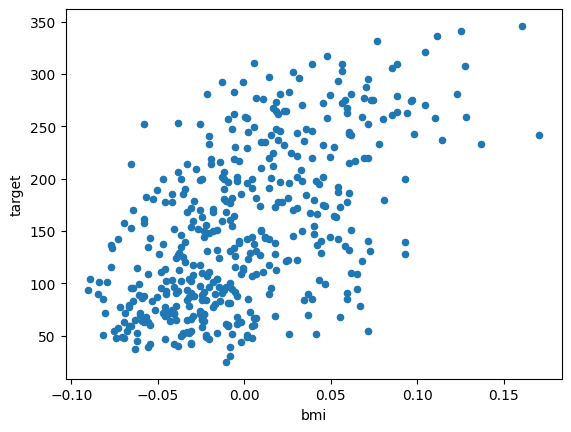

In [31]:
diabetes.frame.plot.scatter(feature_name, 'target')  # on x-axis we plot the body mass index

Осуществить линейную регрессию можно, используя специальный класс [$\texttt{LinearRegression}$](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.get_metadata_routing) из $\texttt{scikit-learn}$:

In [32]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes.data[[feature_name]], diabetes.target)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes.data[[feature_name]])

# Just three steps: create a linear regression object, fit the dataframe and then predict

# We need coefficients to understand the relationship between our input variables and the output, and to make predictions using our model.
print(f"Coefficients: \n{regr.coef_}") # coefficients tell how much each feature affects the target variable (for example in housing dataset it will show that for each bedroom increase the price increase by 100$)
# The intercept is the predicted value of your target variable when all your input variables are zero. In our house price example, this would be the predicted price of a house with 0 square feet and 0 bedrooms.
print(f"Intercept: {regr.intercept_}") # We need the intercept because it's part of the equation that defines our regression line. It's the starting point from which we add or subtract based on our input variables.
# Mean Squared Error is a measure of how well our model is performing. It calculates the average squared difference between our predicted values and the actual values.
print(f"Mean squared error: {mean_squared_error(diabetes.target, diabetes_y_pred):.2f}") # In simple terms, it tells us how far off our predictions are on average. A lower MSE is better, as it means our predictions are closer to the actual values.
# print(f"Coefficient of determination: {r2_score(diabetes.target, diabetes_y_pred):.2f}")
print(f"Coefficient of determination: {regr.score(diabetes.data[[feature_name]], diabetes.target):.2f}")

Coefficients: 
[949.43526038]
Intercept: 152.13348416289617
Mean squared error: 3890.46
Coefficient of determination: 0.34


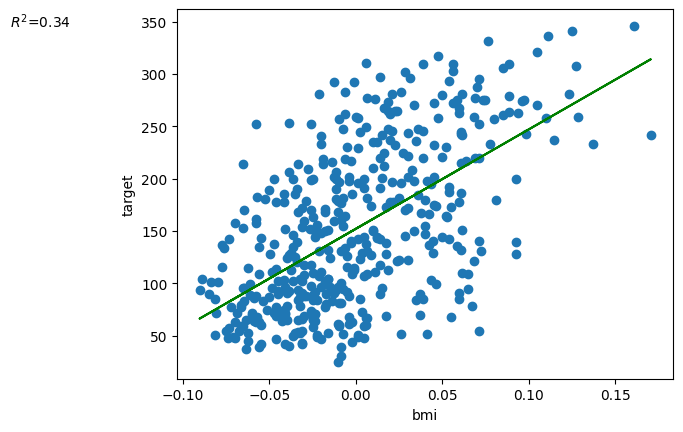

In [33]:
plt.scatter(diabetes.data[feature_name], diabetes.target)   # Now we plot our regression, here we are telling that we need the scatter plot with two features, x-axis as bmi, and Y as target
plt.plot(
    diabetes.data[feature_name],  # X-axis data in the graph
    list(map(
        lambda x: regr.coef_[0]*x+regr.intercept_, # The y-axis data is defined as the equation mx+b, m is the coefficient and b is the intercept
        diabetes.data[feature_name]  
    )),
    color='g'   # color is green
)
plt.text(-.200, 345, f'$R^2$={r2_score(diabetes.target, diabetes_y_pred):.2f}') # plt.text() is used to add the text to the specific location, the x location is 200 and the y location is 345, and we print r^2
plt.xlabel(feature_name)   # labelling the graph on the x-axis
plt.ylabel('target')  # labelling the graph on the y-axis
plt.show()  # rendering the graph

## Множественная линейная регрессия

In [34]:
# Create linear regression object
regr = LinearRegression() 

# Train the model using the training sets
regr.fit(diabetes.data, diabetes.target)  # The fit method trains the linear regression model using the entire diabetes dataset:

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes.data)

print(f"Coefficients: \n{regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"Mean squared error: {mean_squared_error(diabetes.target, diabetes_y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(diabetes.target, diabetes_y_pred):.2f}")

Coefficients: 
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
Intercept: 152.13348416289597
Mean squared error: 2859.70
Coefficient of determination: 0.52
